In [1]:
import pandas as pd

#### Import Clean Dataset

In [2]:
from os.path import exists

if not exists("data/clean_dataset_googleplaystore.csv"):
    import play_store_data
    data_processing = play_store_data.PlayStoreData()
    data_processing.process_all()

df = pd.read_csv("data/clean_dataset_googleplaystore.csv")

df

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genre Principal,Last Updated,Genre Secondaire
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,4.1,159.0,19000000,10000,0.0,0,0,2018-01-07,0
1,Coloring book moana,0,3.9,967.0,14000000,500000,0.0,0,0,2018-01-15,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,4.7,87510.0,8700000,5000000,0.0,0,0,2018-08-01,0
3,Sketch - Draw & Paint,0,4.5,215644.0,25000000,50000000,0.0,1,0,2018-06-08,0
4,Pixel Draw - Number Art Coloring Book,0,4.3,967.0,2800000,100000,0.0,0,0,2018-06-20,2
...,...,...,...,...,...,...,...,...,...,...,...
7724,Chemin (fr),3,4.8,44.0,619000,1000,0.0,0,3,2014-03-23,0
7725,FR Calculator,18,4.0,7.0,2600000,500,0.0,0,8,2017-06-18,0
7726,Sya9a Maroc - FR,18,4.5,38.0,53000000,5000,0.0,0,8,2017-07-25,0
7727,Fr. Mike Schmitz Audio Teachings,18,5.0,4.0,3600000,100,0.0,0,8,2018-07-06,0


c:\Users\ninor\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ninor\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ninor\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ninor\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

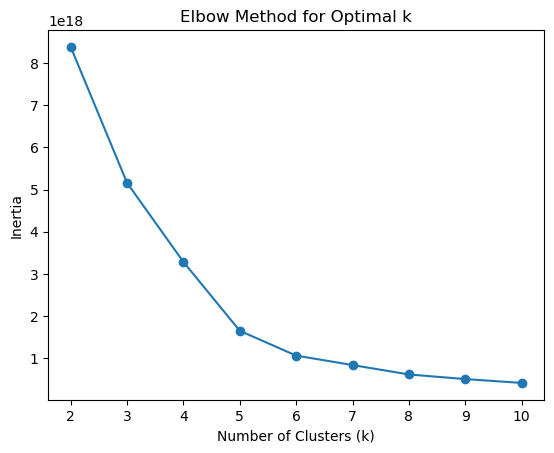

In [3]:
# TODO: pour la date on pourrait la mettre en forme differement si on veut l'utiliser
# ex: timestamp, un boolean + de 3 mois ou pas
# TODO: enlever Content Rating ? parce que c'est encodé, le clustering donne des floats donc ça n'as pas de sens
X = df.drop(columns=["App", "Last Updated", "Category", "Genre Principal", "Genre Secondaire"])

# TODO: normaliser les données ?

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you are exploring a range of cluster numbers from 2 to 10
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [4]:
# On regarde le coude pour choisir k
k = 5
# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X)

# Add the cluster labels to your original DataFrame
df['Cluster'] = clusters

# Compute cluster statistics directly from scaled features
cluster_stats = pd.DataFrame(X, columns=X.columns)
cluster_stats['Cluster'] = clusters
cluster_stats = cluster_stats.groupby('Cluster').mean()
cluster_stats
# TODO: en faire un affichage graphique (réduire les dimensions?) ou qqc de plus utile/explicite

c:\Users\ninor\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Rating,Reviews,Size,Installs,Price,Content Rating
Cluster,,,,,,
0,4.151013,4.237006e+04,1.164265e+07,1.643768e+06,1.328145,0.279924
1,4.260000,1.698429e+07,5.080000e+07,1.000000e+09,0.000000,1.600000
2,4.373333,1.138526e+07,4.790000e+07,5.000000e+08,0.000000,0.100000
3,4.385404,4.195281e+06,5.040155e+07,8.121118e+07,0.000000,0.546584
4,4.209536,1.070518e+05,5.774906e+07,2.773643e+06,0.657434,0.508156
